In [10]:
import numpy as np
import matplotlib.pyplot as plt

def import_data(path):
    data = []
    class_label = []
    with open(path) as f:
        for l in f:
            x1, x2, y = l.strip().split(" ")
            # x1 = float(x1)
            # x2 = float(x2)
            # y = int(y)
            data.append([x1, x2, y])
    data = np.array(data)
    features = ("x1", "x2", "y")
    return data, features

def calculate_entropy(data, ind):
    entropy = 0
    data_feature = data[:,ind]
    instance_set = set(data_feature)
    
    for instance in instance_set:
        p = float(np.sum(data_feature == instance))/len(data_feature)
        #print(p)
        entropy += p * np.log(p)
    entropy = - entropy / np.log(2)
    return entropy
        
def determine_candidate_numeric_split(data, ind):
    c = []
    data_copy = data[:,ind].astype(float)
    sorted_data = data[data_copy.argsort()]
    #print(sorted_data)
    #print(sorted_data[:,1])
    #print(sorted_data[:,-1])
    for i in range(len(sorted_data) - 1):
        if (sorted_data[i+1, -1] != sorted_data[i, -1]):
            c.append(sorted_data[i+1, ind])
    return c
    
def split_data_set(data, ind, value):
    """
    set 1 is >=
    set 2 is <
    """
    set2 = data[np.where(data[:,ind].astype(float) < float(value))]
    #print(data[:,ind].astype(float))
    set1 = data[data[:,ind].astype(float) >= float(value) ]
    #print(np.where(data[:,ind] == value))
    return set1, set2
            
    
def find_best_split(data):
    n_features = len(data[0]) - 1
    n_data = len(data)
    data_entropy = calculate_entropy(data, -1)
    
    best_info_gain_ratio = 0
    best_feature_ind = None
    threshold_candidate = None
    for i in range(n_features):
        candidates = determine_candidate_numeric_split(data, i)
        for candidate in candidates:
            sub_set_1, sub_set_2 = split_data_set(data, i, candidate)
            p1 = float(len(sub_set_1))/n_data
            p2 = float(len(sub_set_2))/n_data
            
            conditional_entropy = p1*calculate_entropy(sub_set_1, -1) + \
                                    p2*calculate_entropy(sub_set_2, -1)
            if (len(sub_set_1) == 0 or len(sub_set_2) == 0):
                entropy = 0
            else:
                entropy = -p1*np.log(p1) - p2*np.log(p2)
            entropy = entropy / np.log(2)
            if (entropy == 0):
                continue
            info_gain = data_entropy - conditional_entropy
            info_gain_ratio = info_gain/entropy
            if (info_gain_ratio > best_info_gain_ratio):
                best_info_gain_ratio = info_gain_ratio
                best_feature_ind = i
                threshold_candidate = candidate
    return best_feature_ind, threshold_candidate
    
def determine_majority_class_label(class_labels):
    count_0 = np.count_nonzero(class_labels == '0')
    count_1 = np.count_nonzero(class_labels == '1')
    majority = None
    if (count_0 > count_1):
        majority = '0'
    else:
        majority = '1'
    return majority

def create_tree(data, features):
    if (len(data) == 0):
        return '1' #  no majority class
    
    best_feature_ind, threshold = find_best_split(data)
    if (best_feature_ind == None):
        class_labels = data[:,-1]
        majority = determine_majority_class_label(class_labels)
        return majority+'(leaf)'
    graph_tree = {features[best_feature_ind] : {}}
    set1, set2 = split_data_set(data, best_feature_ind, threshold)
    graph_tree[features[best_feature_ind]]['>= '+threshold] = create_tree(set1, features)
    graph_tree[features[best_feature_ind]]['< '+threshold] = create_tree(set2, features)
    return graph_tree


1(leaf)


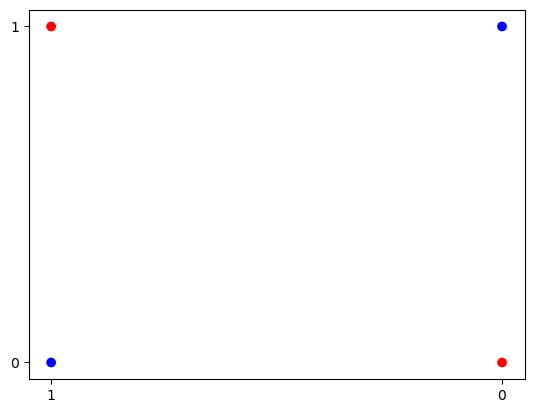

In [2]:
# 2.2
data, features = import_data('./split_refused.txt')
tree = create_tree(data, features)
print(tree)
color = np.array(['red']*4)
color[data[:,-1] == '1'] = 'b'
plt.scatter(data[:,0], data[:,1], c = color)
plt.savefig('./q2.2.png')

In [3]:
# 2.3
dataset, l = import_data("./Druns.txt")
c_list_0 = determine_candidate_numeric_split(dataset, 0)
c_list_1 = determine_candidate_numeric_split(dataset, 1)
print('feature = x1')
for c in c_list_0:
    n_data = len(dataset)
    data_entropy = calculate_entropy(dataset, -1)
    sub_set_1, sub_set_2 = split_data_set(dataset, 0, c)
    p1 = float(len(sub_set_1))/n_data
    p2 = float(len(sub_set_2))/n_data
    conditional_entropy = p1*calculate_entropy(sub_set_1, -1) + \
                            p2*calculate_entropy(sub_set_2, -1)
    #print(sub_set_1)
    if (len(sub_set_1) == 0 or len(sub_set_2) == 0):
        entropy = 0
    else:
        entropy = -p1*np.log(p1) - p2*np.log(p2)
    info_gain = data_entropy - conditional_entropy
    entropy = entropy / np.log(2)
    if (entropy == 0):
        print(f'candidate: {c}, entropy = {entropy}, info gain = {info_gain:.3f}')
        continue
    info_gain_ratio = info_gain/entropy
    print(f'candidate: {c}, info gain ratio = {info_gain_ratio:.3f}')
    
print('feature = x2')
for c in c_list_1:
    n_data = len(dataset)
    data_entropy = calculate_entropy(dataset, -1)
    #print(data_entropy)
    sub_set_1, sub_set_2 = split_data_set(dataset, 1, c)
    p1 = float(len(sub_set_1))/n_data
    p2 = float(len(sub_set_2))/n_data
    conditional_entropy = p1*calculate_entropy(sub_set_1, -1) + \
                            p2*calculate_entropy(sub_set_2, -1)
    if (len(sub_set_1) == 0 or len(sub_set_2) == 0):
        entropy = 0
    else:
        entropy = -p1*np.log(p1) - p2*np.log(p2)
    entropy = entropy / np.log(2)
    
    info_gain = data_entropy - conditional_entropy
    if (entropy == 0):
        print(f'candidate: {c}, entropy = {entropy}, info gain = {info_gain:.3f}')
        continue
    info_gain_ratio = info_gain/entropy
    print(f'candidate: {c}, info gain ratio = {info_gain_ratio:.3f}')

feature = x1
candidate: 0, entropy = 0.0, info gain = 0.000
candidate: 0, entropy = 0.0, info gain = 0.000
candidate: 0, entropy = 0.0, info gain = 0.000
candidate: 0, entropy = 0.0, info gain = 0.000
candidate: 0.1, info gain ratio = 0.101
feature = x2
candidate: -1, info gain ratio = 0.101
candidate: 0, info gain ratio = 0.056
candidate: 6, info gain ratio = 0.236
candidate: 7, info gain ratio = 0.056
candidate: 8, info gain ratio = 0.430


In [4]:
# 2.4
import pydot

dataset, features = import_data("./D3leaves.txt")
tree = create_tree(dataset, features)
            
tree_graph = pydot.Dot(graph_type='graph')
nodes = []
nodes.append((tree, None))
i = 0
while(len(nodes) > 0):
    node, parent = nodes.pop()
    #print(node)
    for key, child in node.items():
        k = str(i)+' :'+key
        #print(k)
        i += 1
        if isinstance(child, dict):
            if parent:
                edge = pydot.Edge(parent, k)
                tree_graph.add_edge(edge)
            nodes.append((child, k))
        else:
            edge = pydot.Edge(parent, k)
            #print(k)
            tree_graph.add_edge(edge)
            edge = pydot.Edge(k, str(i)+' :'+child)
            tree_graph.add_edge(edge)
    
tree_graph.write_png('decision_tree_2.4.png')


In [349]:
# 2.5
import pydot

dataset, features = import_data("./D1.txt")
tree = create_tree(dataset, features)
            
tree_graph = pydot.Dot(graph_type='graph')
nodes = []
nodes.append((tree, None))
i = 0
while(len(nodes) > 0):
    node, parent = nodes.pop()
    #print(node)
    for key, child in node.items():
        k = str(i)+' :'+key
        #print(k)
        i += 1
        if isinstance(child, dict):
            if parent:
                edge = pydot.Edge(parent, k)
                tree_graph.add_edge(edge)
            nodes.append((child, k))
        else:
            edge = pydot.Edge(parent, k)
            #print(k)
            tree_graph.add_edge(edge)
            edge = pydot.Edge(k, str(i)+' :'+child)
            tree_graph.add_edge(edge)
    
tree_graph.write_png('decision_tree_2.5_1.png')


dataset, features = import_data("./D2.txt")
tree = create_tree(dataset, features)
            
tree_graph = pydot.Dot(graph_type='graph')
nodes = []
nodes.append((tree, None))
i = 0
while(len(nodes) > 0):
    node, parent = nodes.pop()
    #print(node)
    for key, child in node.items():
        k = str(i)+' :'+key
        #print(k)
        i += 1
        if isinstance(child, dict):
            if parent:
                edge = pydot.Edge(parent, k)
                tree_graph.add_edge(edge)
            nodes.append((child, k))
        else:
            edge = pydot.Edge(parent, k)
            #print(k)
            tree_graph.add_edge(edge)
            edge = pydot.Edge(k, str(i)+' :'+child)
            tree_graph.add_edge(edge)
    
tree_graph.write_png('decision_tree_2.5_2.png')

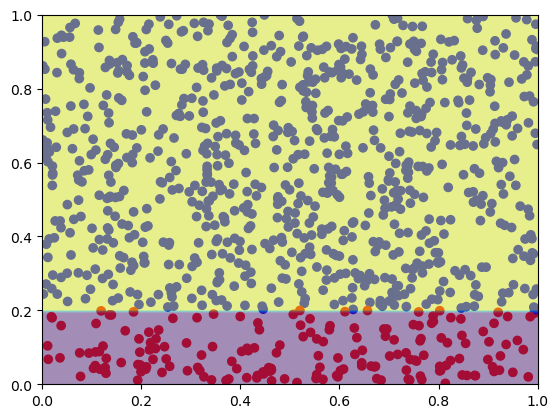

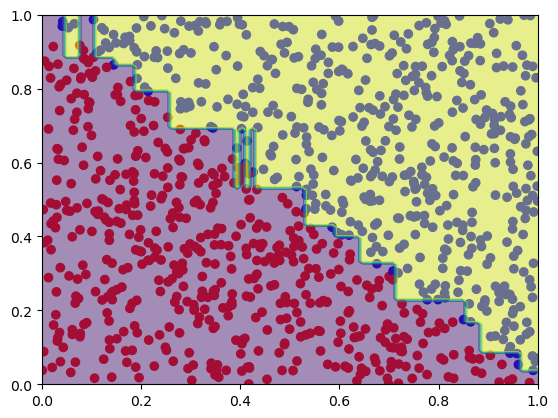

In [5]:
# 2.6
def tree_classifier(features_vec, tree):
    if type(tree) == str:
        #print(tree)
        return tree[0:1]
    
    feature = list(tree.keys())[0]
    subtree = tree[feature]
    subtree_keys = list(subtree.keys())
    if (subtree_keys[0][0:2] == '>='):
        left_subtree = subtree[subtree_keys[0]]
        right_subtree = subtree[subtree_keys[1]]
        threshold = float(subtree_keys[0][3:])
    else:
        left_subtree = subtree[subtree_keys[1]]
        right_subtree = subtree[subtree_keys[0]]
        threshold = float(subtree_keys[0][2:])
        
    #print(left_subtree, right_subtree)
    if feature == 'x1':
        feature_value = features_vec[0]
    else:
        feature_value = features_vec[1]
    if (float(feature_value) >= threshold):
        out = tree_classifier(features_vec, left_subtree)
    else:
        out = tree_classifier(features_vec, right_subtree)
    return out

data, features = import_data('./D1.txt')
D1_tree = create_tree(data, features)

plt.figure()
color = np.array(['red']*len(data))
color[data[:,-1] == '1'] = 'b'
plt.scatter(data[:,0].astype(float), data[:,1].astype(float), c = color)

x0 = np.linspace(0, 1, 100)
x1 = np.linspace(0, 1, 100)
X0, X1 = np.meshgrid(x0, x1)
X = np.c_[X0.ravel(), X1.ravel()]

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], D1_tree)
#print(predicted_class)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)

plt.savefig('./boundary_plot_2.6a.png')

data, features = import_data('./D2.txt')
D2_tree = create_tree(data, features)

plt.figure()

color = np.array(['red']*len(data))
color[data[:,-1] == '1'] = 'b'
plt.scatter(data[:,0].astype(float), data[:,1].astype(float), c = color)

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], D2_tree)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)

plt.savefig('./boundary_plot_2.6b.png')

[[  9.]
 [ 19.]
 [ 49.]
 [129.]
 [269.]]


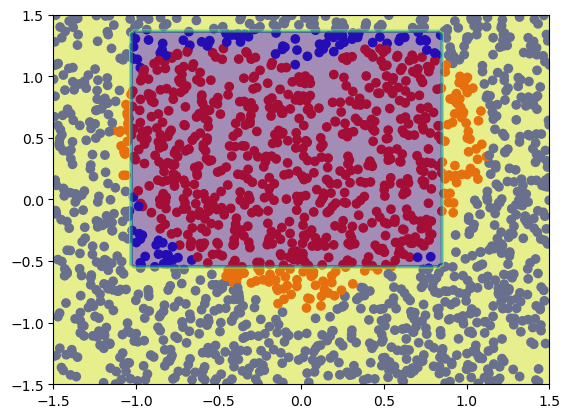

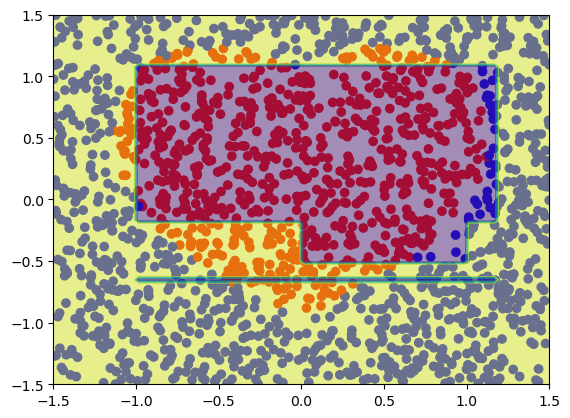

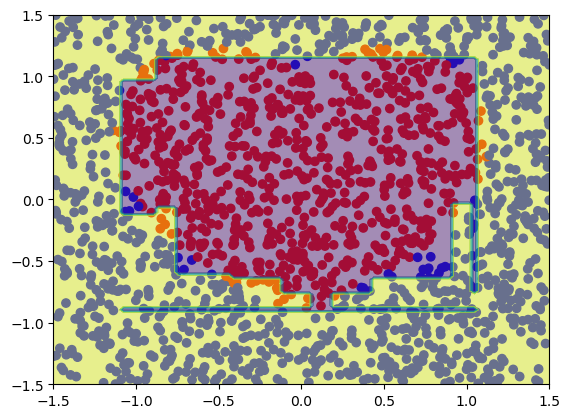

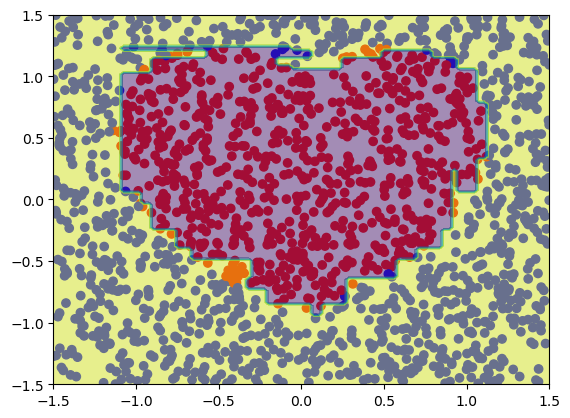

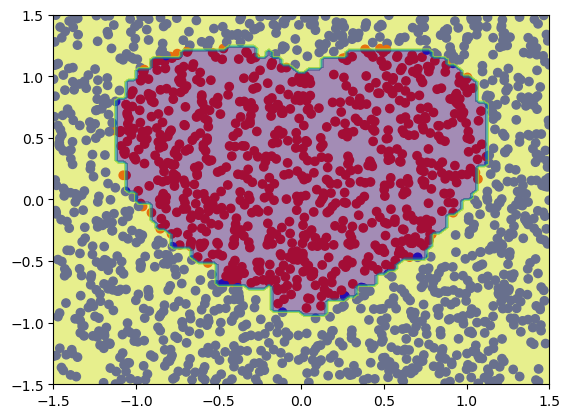

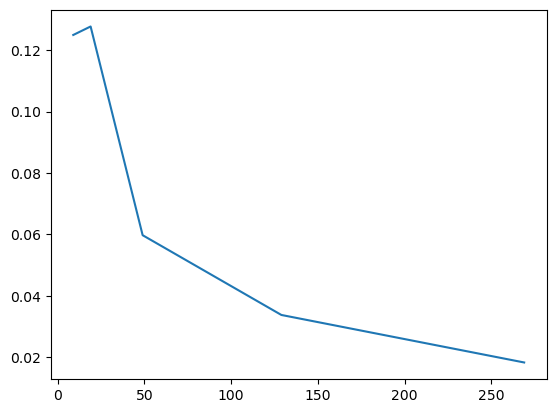

In [27]:
# Q2.7

data, features = import_data('./Dbig.txt')
error_rate = np.zeros((5, 1))
number_of_nodes = np.zeros((5, 1))

import random


def create_tree(data, features):
    number_of_nodes = 1
    if (len(data) == 0):
        return '1', number_of_nodes #  no majority class
    
    best_feature_ind, threshold = find_best_split(data)
    if (best_feature_ind == None):
        class_labels = data[:,-1]
        majority = determine_majority_class_label(class_labels)
        return majority+'(leaf)', number_of_nodes
    graph_tree = {features[best_feature_ind] : {}}
    set1, set2 = split_data_set(data, best_feature_ind, threshold)
    # left_tree, nn = create_tree(set1, features)
    graph_tree[features[best_feature_ind]]['>= '+threshold], n1 = create_tree(set1, features)
    graph_tree[features[best_feature_ind]]['< '+threshold], n2 = create_tree(set2, features)
    number_of_nodes = number_of_nodes + n1 + n2
    return (graph_tree, number_of_nodes)

def model_error_rate(test_set, decision_tree):
    error_count = 0
    
    for i in range(len(test_set)):
        prediction = tree_classifier(test_set[i], decision_tree)
        if (prediction != test_set[i,-1]):
            error_count += 1
    rate = error_count/len(test_set)  
    return rate


n = len(data)
random_ind = np.arange(n)
np.random.shuffle(random_ind)
data = data[random_ind]

train_set = data[0:8192]
test_set = data[8192:]

x0 = np.linspace(-1.5, 1.5, 100)
x1 = np.linspace(-1.5, 1.5, 100)
X0, X1 = np.meshgrid(x0, x1)
X = np.c_[X0.ravel(), X1.ravel()]


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_32 = train_set[random_ind[0:32]]
tree_32, nn = create_tree(train_set_32, features)
error_rate[0] = model_error_rate(test_set, tree_32)
number_of_nodes[0] = nn

plt.figure()
color = np.array(['red']*len(test_set))
color[test_set[:,-1] == '1'] = 'b'
plt.scatter(test_set[:,0].astype(float), test_set[:,1].astype(float), c = color)

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], tree_32)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_128 = train_set[random_ind[0:128]]
tree_128, nn = create_tree(train_set_128, features)
error_rate[1] = model_error_rate(test_set, tree_128)
number_of_nodes[1] = nn

plt.figure()
color = np.array(['red']*len(test_set))
color[test_set[:,-1] == '1'] = 'b'
plt.scatter(test_set[:,0].astype(float), test_set[:,1].astype(float), c = color)

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], tree_128)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)

random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_512 = train_set[random_ind[0:512]]
tree_512, nn = create_tree(train_set_512, features)
error_rate[2] = model_error_rate(test_set, tree_512)
number_of_nodes[2] = nn

plt.figure()
color = np.array(['red']*len(test_set))
color[test_set[:,-1] == '1'] = 'b'
plt.scatter(test_set[:,0].astype(float), test_set[:,1].astype(float), c = color)

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], tree_512)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)

random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_2048 = train_set[random_ind[0:2048]]
tree_2048, nn = create_tree(train_set_2048, features)
error_rate[3] = model_error_rate(test_set, tree_2048)
number_of_nodes[3] = nn

plt.figure()
color = np.array(['red']*len(test_set))
color[test_set[:,-1] == '1'] = 'b'
plt.scatter(test_set[:,0].astype(float), test_set[:,1].astype(float), c = color)

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], tree_2048)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)

train_set_8192 = train_set
tree_8192, nn = create_tree(train_set_8192, features)
error_rate[4] = model_error_rate(test_set, tree_8192)
number_of_nodes[4] = nn

plt.figure()
color = np.array(['red']*len(test_set))
color[test_set[:,-1] == '1'] = 'b'
plt.scatter(test_set[:,0].astype(float), test_set[:,1].astype(float), c = color)

predicted_class = np.zeros((len(X),1))
for i in range(len(X)):
    predicted_class[i] = tree_classifier(X[i], tree_8192)
plt.contourf(X0, X1, predicted_class.reshape(X0.shape), alpha=0.5)

plt.figure()
plt.plot(number_of_nodes, error_rate)

print(number_of_nodes)
print(error_rate)

[[ 11.]
 [ 27.]
 [ 59.]
 [133.]
 [241.]]
[[0.19358407]
 [0.0835177 ]
 [0.04756637]
 [0.03042035]
 [0.01769912]]


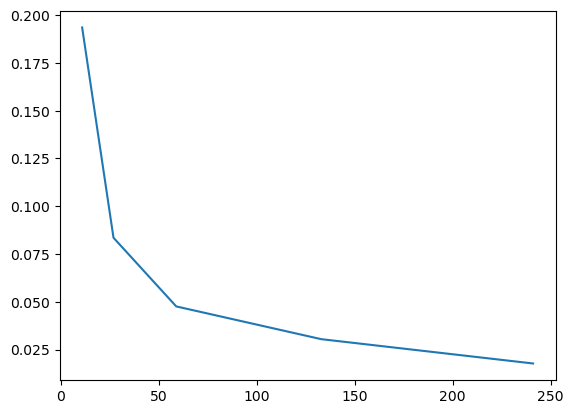

In [119]:
# Q3

from sklearn import tree
import matplotlib.pyplot as plt

data, features = import_data('./Dbig.txt')
error_rates = np.zeros((5, 1))
number_of_nodes = np.zeros((5, 1))

n = len(data)
random_ind = np.arange(n)
np.random.shuffle(random_ind)
data = data[random_ind]
train_set = data[0:8192]
test_set = data[8192:]

x0 = np.linspace(-1.5, 1.5, 100)
x1 = np.linspace(-1.5, 1.5, 100)
X0, X1 = np.meshgrid(x0, x1)
X = np.c_[X0.ravel(), X1.ravel()]


decision_tree = tree.DecisionTreeClassifier()

def sk_learn_decision_tree(train_set, test_set):
    tree = decision_tree.fit(train_set[:,0:-1],train_set[:,-1])
    num = decision_tree.tree_.node_count
    
    test_predictions = tree.predict(test_set[:,0:-1])
    
    error = 0
    for i in range(len(test_predictions)):
        if(test_predictions[i] != test_set[i,-1]):
            error += 1
    error_rate = error/len(test_predictions)
    n_nodes = tree.tree_.node_count
    return n_nodes, error_rate


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_32 = train_set[random_ind[0:32]]
number_of_nodes[0], error_rates[0] = sk_learn_decision_tree(train_set_32, test_set)


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_128 = train_set[random_ind[0:128]]
number_of_nodes[1], error_rates[1] = sk_learn_decision_tree(train_set_128, test_set)


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_512 = train_set[random_ind[0:512]]
number_of_nodes[2], error_rates[2] = sk_learn_decision_tree(train_set_512, test_set)


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_2048 = train_set[random_ind[0:2048]]
number_of_nodes[3], error_rates[3] = sk_learn_decision_tree(train_set_2048, test_set)


random_ind = np.arange(8192)
np.random.shuffle(random_ind)
train_set_8192 = train_set
number_of_nodes[4], error_rates[4] = sk_learn_decision_tree(train_set_8192, test_set)

print(number_of_nodes)
print(error_rates)

plt.figure()
plt.plot(number_of_nodes, error_rates)

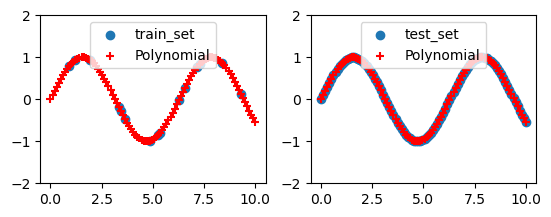

Mean square error of train_set: 5.808e-08
Mean square error of test_set: 5.808e-08


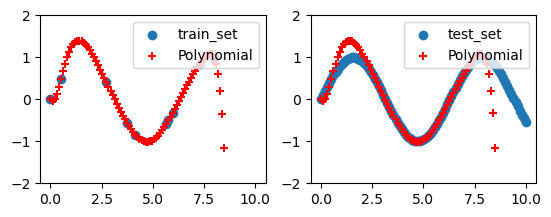

Mean square error of train_set: 5.215e+02
Mean square error of test_set: 5.234e+02


In [162]:
# Q4
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error
from numpy.polynomial.polynomial import Polynomial

# generate the data set
x_train = np.linspace(0,10,100)
y_train = np.sin(x_train)
x_test = np.linspace(0,10,100)
y_test = np.sin(x_test)

random_ind = np.arange(100)
np.random.shuffle(random_ind)
size_of_train_set = 15
x_s = x_train[random_ind[0:size_of_train_set]]
y_s = y_train[random_ind[0:size_of_train_set]]
#plt.plot(x_s, y_s, 'o')

poly = lagrange(x_s, y_s)


f = Polynomial(poly.coef[::-1])
y_predicted_train = f(x_train)
y_predicted_test = f(x_test)

# # plot the results
plt.figure()

plt.subplot(221)
plt.scatter(x_s, y_s, label='train_set')
plt.scatter(x_train, y_predicted_train, label='Polynomial', c = 'r',marker = '+')
plt.ylim(-2,2)
plt.legend()

plt.subplot(222)
plt.scatter(x_test, y_test, label='test_set')
plt.scatter(x_test, y_predicted_test, label='Polynomial', c = 'r', marker = '+')
plt.ylim(-2,2)
plt.legend()

plt.show()

train_mean_square_error = mean_squared_error(y_train, y_predicted_train)
print(f"Mean square error of train_set: {train_mean_square_error:.3e}")
test_mean_square_error = mean_squared_error(y_test, y_predicted_test)
print(f"Mean square error of test_set: {test_mean_square_error:.3e}")


noise_std = 0.001
x_train = np.linspace(0,10,100)
y_train = np.sin(x_train)
x_test = np.linspace(0,10,100)
y_test = np.sin(x_test)

noise = np.random.normal(0, noise_std, 100)
x_train += noise

noise = np.random.normal(0, noise_std, 100)
x_test += noise


random_ind = np.arange(100)
np.random.shuffle(random_ind)
size_of_train_set = 10
x_s = x_train[random_ind[0:size_of_train_set]]
y_s = y_train[random_ind[0:size_of_train_set]]
#plt.plot(x_s, y_s, 'o')

poly = lagrange(x_s, y_s)


f = Polynomial(poly.coef[::-1])
y_predicted_train = f(x_train)
y_predicted_test = f(x_test)

# # plot the results
plt.figure()

plt.subplot(221)
plt.scatter(x_s, y_s, label='train_set')
plt.scatter(x_train, y_predicted_train, label='Polynomial', c = 'r',marker = '+')
plt.ylim(-2,2)
plt.legend()

plt.subplot(222)
plt.scatter(x_test, y_test, label='test_set')
plt.scatter(x_test, y_predicted_test, label='Polynomial', c = 'r', marker = '+')
plt.ylim(-2,2)
plt.legend()

plt.show()

train_mean_square_error = mean_squared_error(y_train, y_predicted_train)
print(f"Mean square error of train_set: {train_mean_square_error:.3e}")
test_mean_square_error = mean_squared_error(y_test, y_predicted_test)
print(f"Mean square error of test_set: {test_mean_square_error:.3e}")